# Project: Investigation of TMDb database to draw attention towards movies profit.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this assignment a movie database with 10866 entries is being studied to draw conclusions on how the  profit generated by the movie relates with few other factors. The metadata of the movies has been taken from TMDb and contains various entries like name of the movie, budget, release date, run-time, revenue generated, popularity, grenre, cast, director, production house, keywords, tagline, website, vote-count and  vote average (movie rating).
Let's take a look at the type of data which we have.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(100)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

### Questions

From the data give above, few questions which pop in my mind are :-
<font color=blue>    1. Does making shorter movies by length generate more profit?</font><br>

<font color=blue>    2. How much does popularity of a movie affect movie's profit and revenue.</font><br>

<font color=blue>    3. Which year saw most profits generated.</font>

## Data Wrangling


Before we answer the above questions, let's first analyze the data we have and try to understand how the data is, What all data do we need?
 - Shape of the dataset.

In [3]:
df.shape

(10866, 21)

This shows that the database has 10866 entries with 21 columns.
- Information about the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The above shown data gives us the information about number of entries for each field. It can be observed that few columns are missing chunk of data. Many movies don't have a homepage or tagline details. Such missing information won't be of any use to us. We will later remove such entries.
 - The distribution of data


In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


With the above we can see the standard deviation, mean, maximum, minimum, and distribution of data based on percentage.

### Data cleaning - DROP

It's time to remove unwanted data to make it appropriate for our use. By using df.drop(), we wil remove all unwanted columns which do not add value to our present challenge of finding financial doing of the movies.
One of the reasons to drop few columns like homepage, tagline, genres, directors, production houses is that they are missing verbal meta data about the movies. Which can't be recreated using data wrangling methods which work well with quantative values. Hence, there's no need to keep such columns as such.


In [3]:
df.drop(['imdb_id','tagline','homepage','keywords','overview','cast','director','genres','production_companies', 'release_date'], axis=1,inplace=True)

The above will drop columns imdb_id','tagline','homepage','keywords','overview'. Which won't be helpful for us to answer our desired questions.

The dataset after dropping the above looks like this now.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(1)
memory usage: 933.9+ KB


### Checking for duplicate data entry and removing them

In [11]:
df.duplicated().sum()

1

This shows, there's one duplicate data entry. In next step, we will remove the duplicate entry.

In [13]:
df.drop_duplicates(keep = 'first', inplace = True)

To check if the duplicate data has been removed, let's check the shape of our file

In [17]:
df.shape

(10865, 12)

As we can see, the number of columns now in the database are 10865, prior this operation we had 10866 entries.

#### Now, we will look into movie entries which have 0 in revenue and profit. Such records will hurt our study, so we will operate on such entries and replace 0's with NaN. Later, we will drop such entries with NaN.

In [19]:
columns = ['budget', 'revenue']
df[columns] = df[columns].replace(0, np.NaN)
df.dropna(subset = columns, inplace = True)

In [21]:
df.shape


(3854, 12)

After performing the removal operation, we can see the dataset we now have is only of 3854 movie entries.

### Creating the data how it's needed - Creating columns
In this project we will be working with popularity, budget, revenue, runtime, budget_adj, revenue_adj and profit. And from the above df.info() command we can see that they are not missing any values or there isn't any data discrepancy. Hence, there's no need to recreate data for such columns
<br>
<br>
A profit column is missing. So, let's create a profit and profit_adj column.
We know that, Profit is the difference between revenue generated by the movie and the budget spent on it.

In [23]:
df['profit'] = pd.Series(df['revenue']-df['budget'])

In [24]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


As we can see, the profit column has been successfully added into our dataset.

Now, let's create profit_adj column. We know that, profit_adj = revenue_adj - budget_adj


In [25]:
df['profit_adj'] = pd.Series(df['revenue_adj']-df['budget_adj'])

Since, the required dataset is ready, let's try to answer the questions.

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 : Does making shorter movies by length generate more profit?

To answer this question, we will need the profit geenrated by the movies. In the earlier part, we created profit column.

Now, let's create a graph plot to show us the distribution of profit when compared with runtime of the movie.

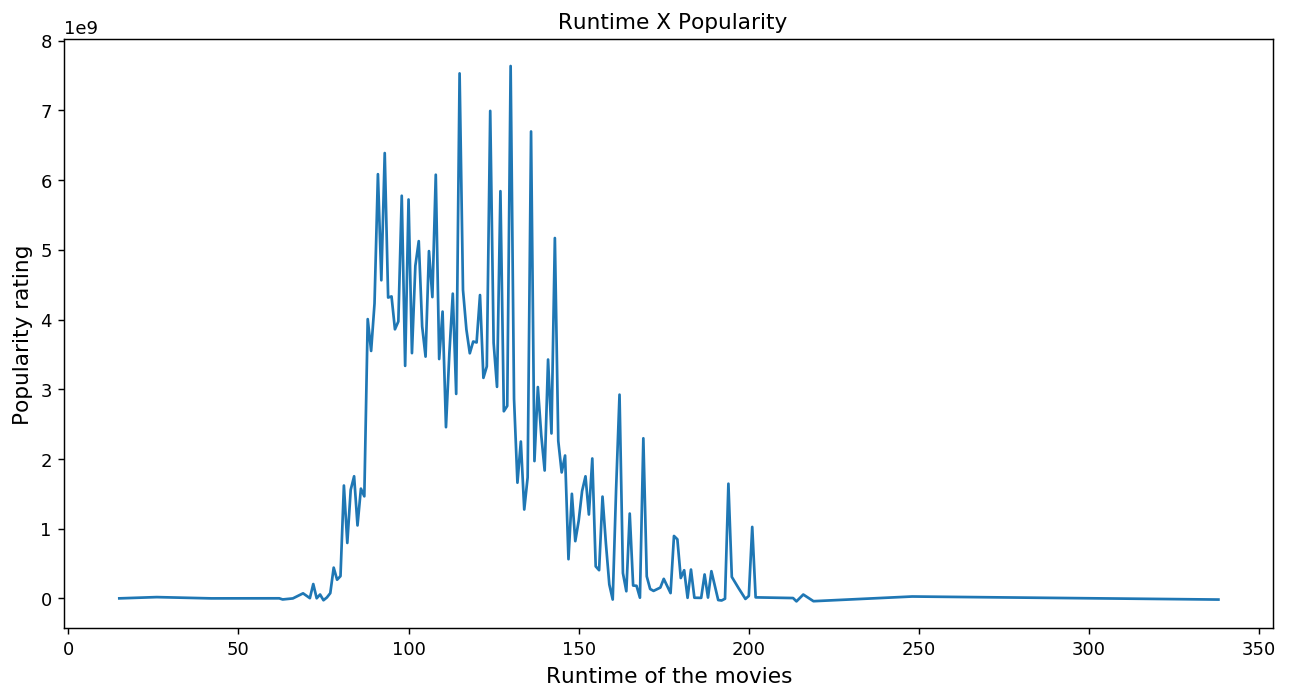

In [26]:
profit_runtime = df.groupby('runtime')['profit'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Runtime of the movies', fontsize = 12)
plt.ylabel('Popularity rating', fontsize = 12)
plt.title(' Runtime X Popularity')
plt.plot(profit_runtime)
plt.show()

#### Explanation
It can be observed with the above plotted graph that movies are more profitable when their runtime is around 100-150 units. Anything above that does not generate profit to its full potential.


### Question 2 : How much does popularity of a movie affect movie's profit and revenue.

To analyse an answer for this question, the below mentioned swarm-plot will be helpful.

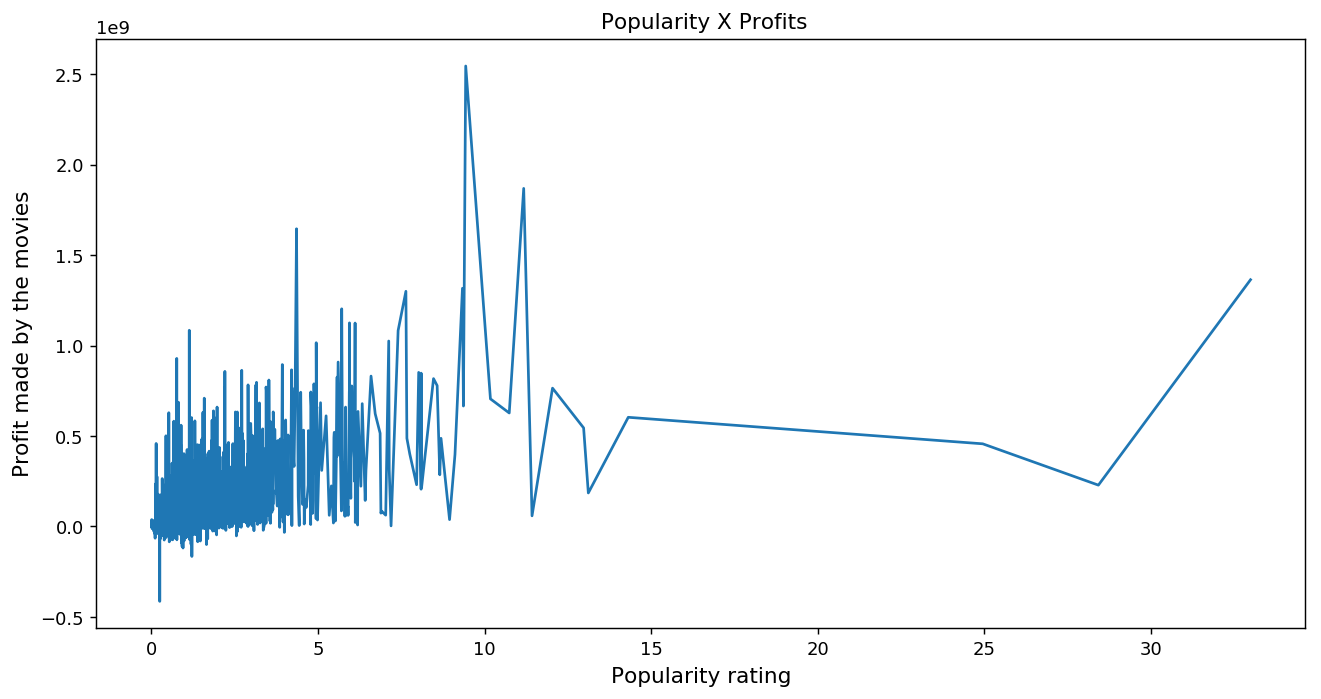

In [27]:
profit_popularity = df.groupby('popularity')['profit'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Popularity rating', fontsize = 12)
plt.ylabel('Profit made by the movies', fontsize = 12)
plt.title(' Popularity X Profits')
plt.plot(profit_popularity)
plt.show()

Text(0,0.5,'Number of Movies')

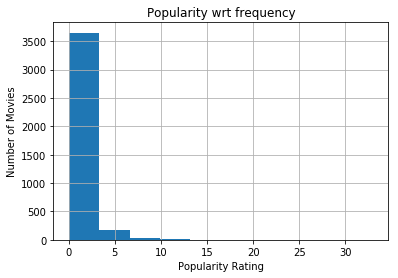

In [28]:
df['popularity'].hist()
plt.title("Popularity wrt frequency")
plt.xlabel("Popularity Rating")
plt.ylabel("Number of Movies")

#### Explanation
It can be observed from this graph that popularity and profit distribution that TMDb popularity does not affect movie's profit margin that much. Movies with lesser popularity readings too have done well. It can also be inferred that maximum movies have had popularity ratings around 0.6 and shows a constant cluster between 0.2 to 3.

### Question 3 : Which year saw most profits generated.

To find the answer to this question, we will have to compare profits column with year in which movie was released.

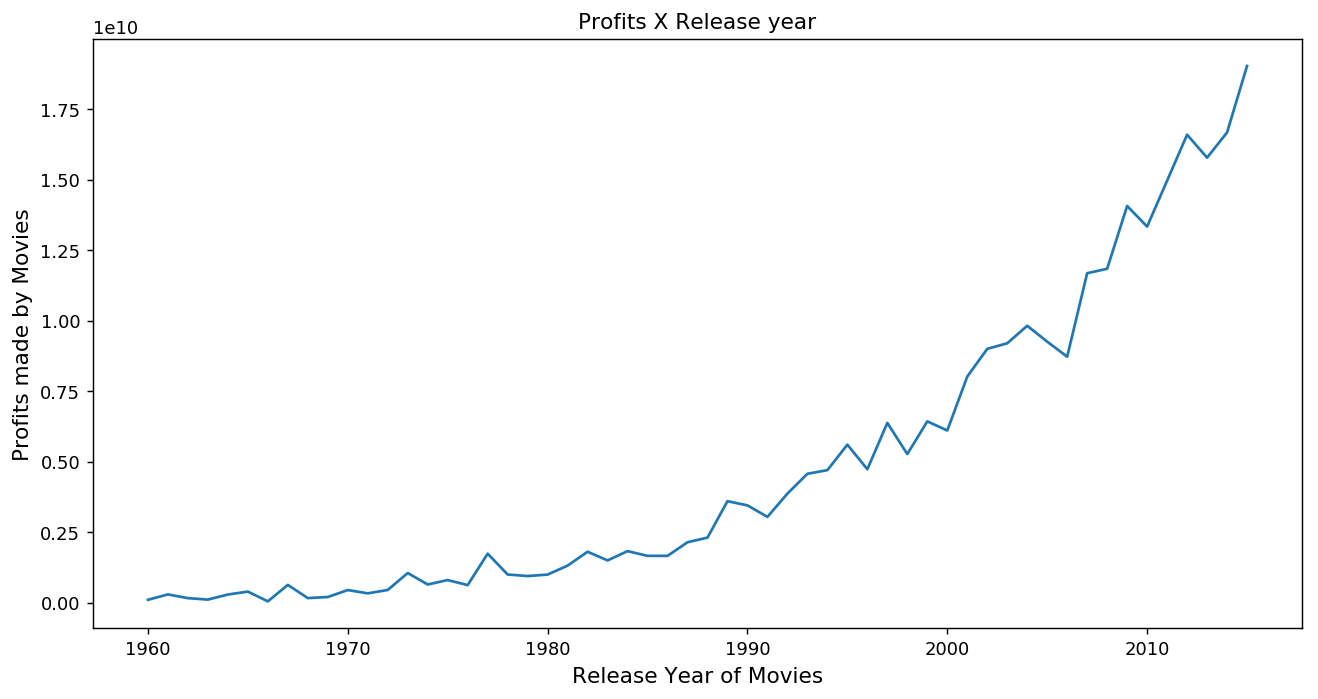

In [29]:
profit_year = df.groupby('release_year')['profit'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies', fontsize = 12)
plt.ylabel('Profits made by Movies', fontsize = 12)
plt.title('Profits X Release year')
plt.plot(profit_year)
plt.show()

### Explanation

It can be observed that movies are constantly making profits since the beginning and the profit graph keeps on increasing. Since the dollar rates vary around the time period, we will use revenue_adj and budget_adj to calculate profit_adj, which will be analyzing the profit with repsect to dollar rates of 2010 (source : https://www.kaggle.com/tmdb/tmdb-movie-metadata/discussion/45990. Which states "budget_adj and revenue_adj show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time."). 

We already created profit_adj.


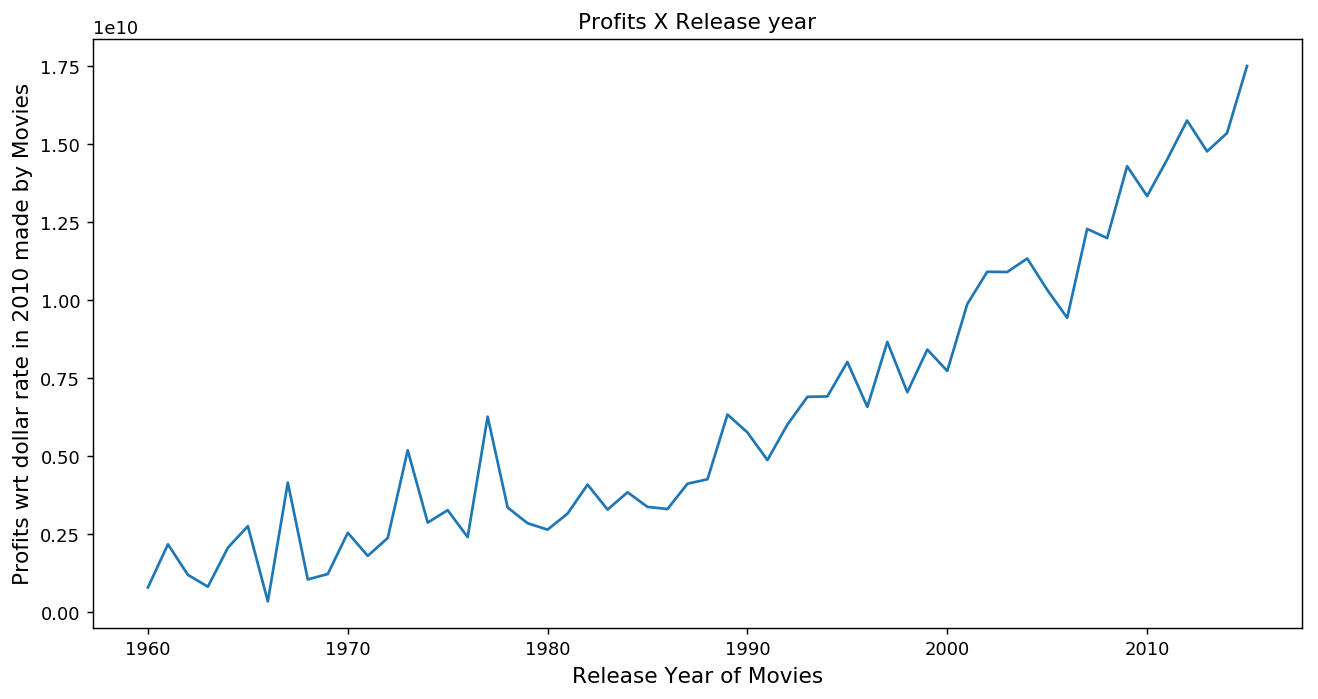

In [30]:
profitadj_year = df.groupby('release_year')['profit_adj'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies', fontsize = 12)
plt.ylabel('Profits wrt dollar rate in 2010 made by Movies', fontsize = 12)
plt.title('Profits X Release year')
plt.plot(profitadj_year)
plt.show()

As we can see, the profit wrt common dollar rate has changed the graph. Despite having many new ups and downs, as the years have increased the profit margins have kept increasing.

<a id='conclusions'></a>
## Conclusions

With the help of matplotlib we have easily answered the question which we posed at the introduction of this assignment.

#### 1. Does making shorter movies by length generate more profit?
    Making shorter movies do help but the best performing movies tend to be in between 100-150 units.

#### 2. How much does popularity of a movie affect movie's profit and revenue.
    Popularity of movies on TMDb does affect movie's profit but not to a great extent. Movies with popularity rating between 0.2 to 3 have done much better than anything above that rating.

#### 3. Which year saw most profits generated.
    The profit keeps on increasing as years pass by. The latest year being 2015 saw the best profit.
    
### Limitations

Since, the data worked upon is ranged from 1960 - 2015. Multiple decades having their own style of movie promotions, presentation. In each era viewers have different taste. We have moved from directors first trying different methods to attract viewers to finding a perfect movie making formula which leads to a good profit generation. This being said, The above conclusions don't mean that someone making a movie now or after 2015 will attain good profit if there movie has a runtime between 100-150 units.

It depends on multiple factors like story, starcast and financial scenario of the viewers. During demonitisation in India in 2016, several great movies which fitted perfectly in all the three criterias didn't do well as people did not have money in hand to spend on entertainment. Which resulted in several good movies performing poor.

### Future Work

To expand this project, we can work more with verbal data and find out which director's movies did will with respect to revenue. Also, can find out a perfect formula of starcasts, directors and genres which will increase the probability of making more profit.

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0